# Introduction

The online hotel reservation channels have dramatically changed booking possibilities and customers' behavior. 
A significant number of hotel reservations are called-off due to cancellations or no-shows.
The typical reasons for cancellations include change of plans, scheduling conflicts, etc.
This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial 
to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.


Goal is to predict if the customer is going to honor the reservation or cancel it.

## Table of Content

* [Importing Libraries](#import)
* [Loading Data](#load)
* [Exploratory Data Analysis](#eda)
* [Data Preprocessing](#preprocess)
* [Model Prediction and Evaluation](#model)

## <font color='green'>Importing Libraries<font><a class='anchor' id='import'>

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

#data transformation
from scipy import stats

#preprcossing
from sklearn.preprocessing import  MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#model for classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import catboost as cb

#model evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score,precision_recall_curve,recall_score

## <font color='green'>Loading Data<font><a class='anchor' id='load'>


In [2]:
data = pd.read_csv('Hotel Reservations.csv')

In [3]:
#viewing  random sample of Dataset
data.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
35772,INN35773,2,0,2,2,Meal Plan 1,0,Room_Type 1,103,2018,12,18,Online,0,0,0,88.40,0,Canceled
12921,INN12922,2,0,1,2,Meal Plan 1,0,Room_Type 1,28,2018,12,30,Offline,0,0,0,141.67,1,Not_Canceled
14951,INN14952,2,0,0,4,Not Selected,0,Room_Type 1,134,2018,7,13,Online,0,0,0,89.25,1,Not_Canceled
13092,INN13093,2,0,2,2,Meal Plan 1,0,Room_Type 4,55,2018,1,29,Online,0,0,0,84.45,1,Not_Canceled
30828,INN30829,2,0,0,5,Not Selected,0,Room_Type 1,35,2018,2,9,Online,0,0,0,67.50,1,Canceled
8681,INN08682,3,0,2,4,Meal Plan 1,0,Room_Type 1,2,2017,12,23,Online,0,0,0,91.68,1,Not_Canceled
30685,INN30686,0,2,2,3,Meal Plan 1,0,Room_Type 2,151,2018,8,19,Online,0,0,0,99.30,1,Canceled
11705,INN11706,2,0,0,2,Meal Plan 1,0,Room_Type 1,35,2017,10,16,Offline,0,0,0,89.28,3,Not_Canceled
20925,INN20926,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,101.50,0,Not_Canceled
28559,INN28560,1,0,2,2,Meal Plan 1,0,Room_Type 4,81,2018,11,6,Online,0,0,0,146.60,1,Not_Canceled


In [4]:
data.shape

(36275, 19)

The Dataset contains 36275 rows and 19 columns.

## <font color='green'>Exploratory Data Analysis<font><a class='anchor' id='eda'>

In [5]:
#view the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

So many columns!!!!!

Lets see what information they present
- **Booking ID**: unique identifier of each booking
- **no_of_adults:** Number of adults
- **no_of_children:** Number of Children
- **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **type_of_meal_plan:** Type of meal plan booked by the customer:
- **required_car_parking space:** Does the customer require a car parking space? (0 - No, 1- Yes)
- **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- **lead time:** Number of days between the date of booking and the arrival date
- **arrival year:** Year of arrival date
- **arrival_month:** Month of arrival date 
-  **arrival_date:** Date of the month
- **market_segment_type:** Market segment designation.
- **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
- **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking 
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking 
- **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **no_of_special_requests:** Total number of special requests made by the customer (e.g.high floor, view from the room, etc)
- **booking_status:** Flag indicating if the booking was canceled or not.

Wow! Thats a lot of information to digest!!

For most of this type of problem , usually ID is not that important feature so we will drop that

In [6]:
data.drop(columns=['Booking_ID'], axis=1, inplace=True)

In [7]:
data.shape

(36275, 18)

Checking for any `Duplicate Data`

In [8]:
data.duplicated(subset = None, keep = 'first').sum()

10275

It will be safe to drop this duplicated data for futher ease

In [9]:
data2 = data.drop_duplicates()

In [10]:
data2.shape

(26000, 18)

In [11]:
#lets check the data description now
data2.describe(include= 'all')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,26000.000000,26000.000000,26000.000000,26000.000000,26000,26000.000000,26000,26000.000000,26000.000000,26000.000000,26000.000000,26000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,20398,NaN,18640,NaN,NaN,NaN,NaN,20019,NaN,NaN,NaN,NaN,NaN,18558
mean,1.890000,0.141231,0.882385,2.261923,NaN,0.042115,NaN,66.452846,2017.850269,7.332923,15.750231,NaN,0.032769,0.028538,0.213115,105.695838,0.741962,NaN
std,0.528702,0.462502,0.887371,1.512341,NaN,0.200856,NaN,68.606799,0.356814,3.138925,8.849394,NaN,0.178035,0.408891,2.068243,37.876592,0.815109,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,12.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.750000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,44.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,100.000000,1.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,100.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,127.000000,1.000000,NaN


#### Some inferences can be concluded form the above chart is
- Range of adult booking is  (2-4)
- We have two years of data 2017,2018
- Arrival month  are encoded values
-  minimum value  for `avg_price_per_room` is 0.00 euro `(suspiscious!!!) (potential Outlier Alert!!)`
- Target variable contains only two unique feature `(Relief!!)`

##### Lets try to visualize the data by plotting various graphs

In [12]:
data2.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

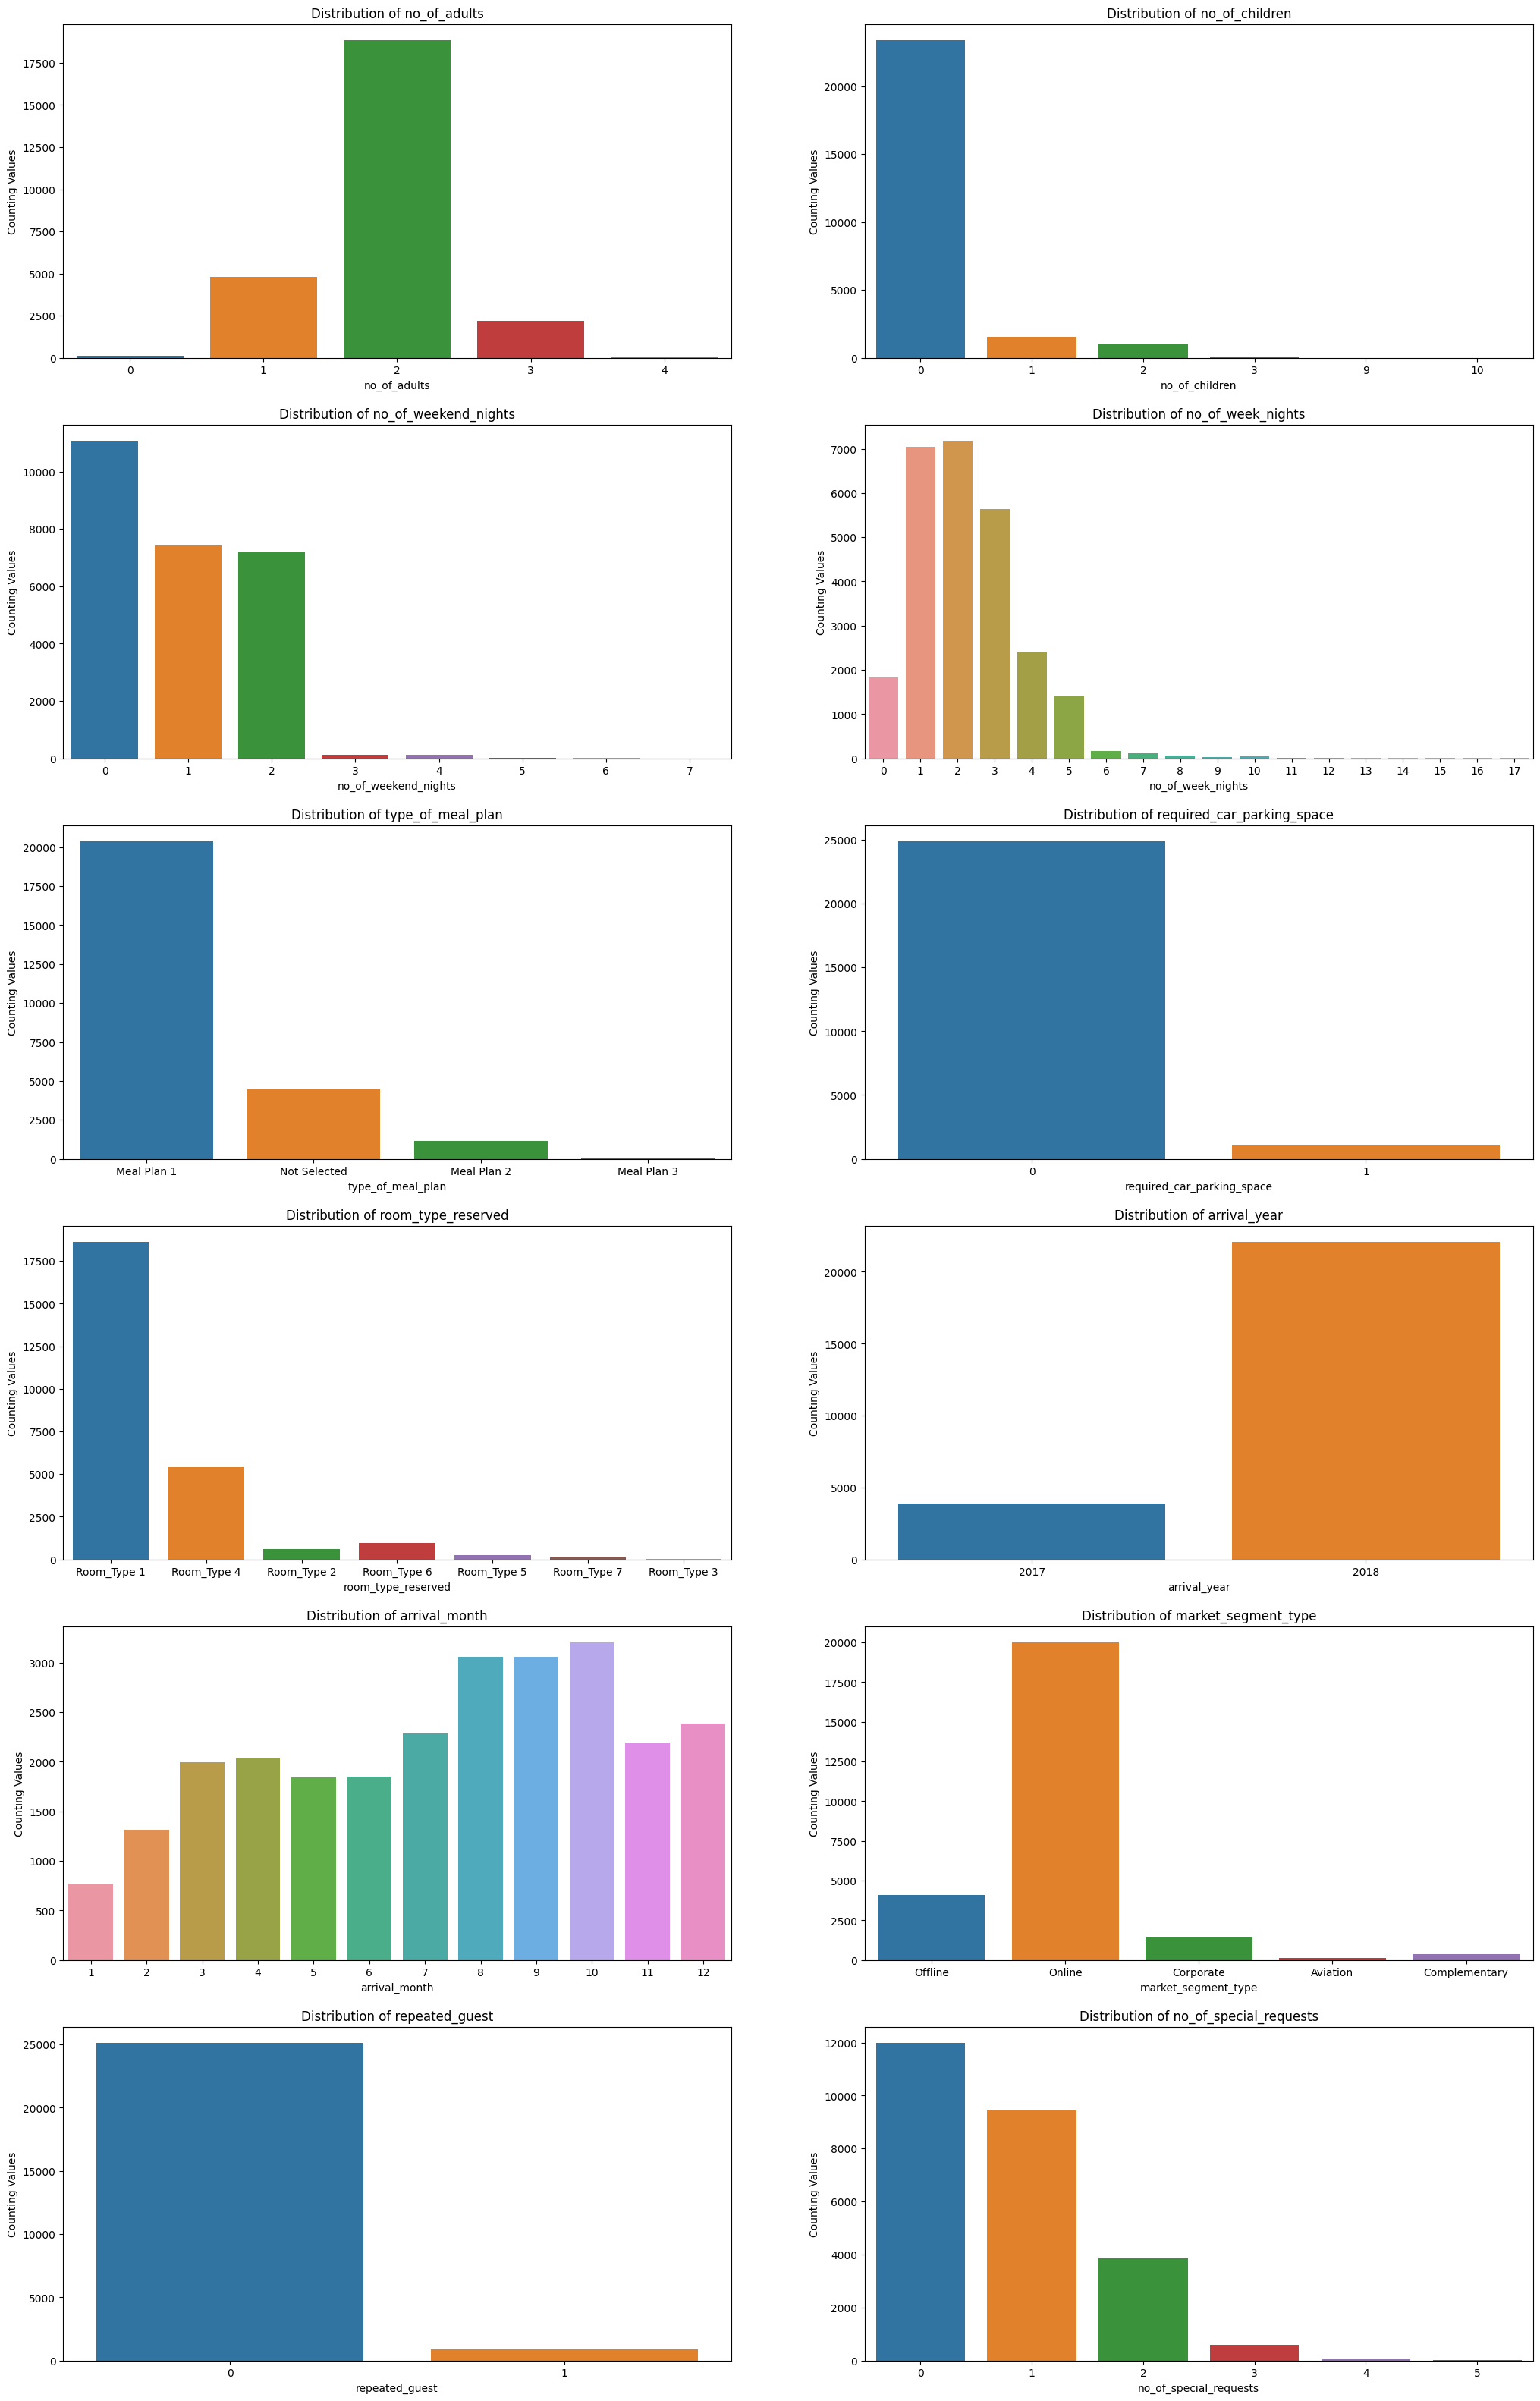

In [13]:
#creating list of categorical column
cat_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_special_requests']
no_cat_col = len(cat_columns)
subplot_row = no_cat_col // 2
plt.figure(figsize = (25,40))
for i in range(no_cat_col):
    plt.subplot(subplot_row,2,i+1)
    sns.countplot(x = data2[cat_columns[i]],data = data2)
    plt.title(f'Distribution of {cat_columns[i]}')
    plt.ylabel('Counting Values')

#### Inferences from above graphs
- **no_of_adults**
        - most of the bookings are done for 2 people
- **no_of_children**
        - for most of the booking done the adult has no i.e 0 children
- **'no_of_weekend_nights', no_of_week_nights**
        - Most booking are done of 1 to 3 week-day nights.
- **type_of_meal_plan**
        - Most frequent is `Meal-type-1`
- **required_car_parking_space**
        - Generally most people dont require parking , so  the Most frequent value is 0
- **room_type_reserved**
        - most frequent is `Room Type 1`
       
- **arrival_month**
        - Winter months (i.e July to October) shows most number of bookings

#### <font color='pink'>Therefore we concluded to following assumptions:</font>
* The hotel mainly serves `couples` `without` any `kids`
* Majority of Bookings are made in winter season`(July and October)`.
* Room type reserved mostly room types like double bed rooms i.e `Room Type 1` and meal as `Meal Type 1`or `Not Selected`.
* Almost `No` need of car `parking space`.
* Majority of booking is for year `2018` and done from `Online` Market Place.
* Majority of guest are `new customers`.
* Majority of customer has `no` or `one` special request
* New feature as `no_of_days` can be created using `no_of_weekend_nights + no_of_week_nights`








In [14]:
#data where number of adults are 0 and number of childeren is also 0
data2[(data2['no_of_adults'] < 1) & (data2['no_of_children'] < 1)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


So  no outliers are present in this two columns

#### Exploration of 'Lead_time'

Text(0.5, 0, 'Number of days between booking and arrival date')

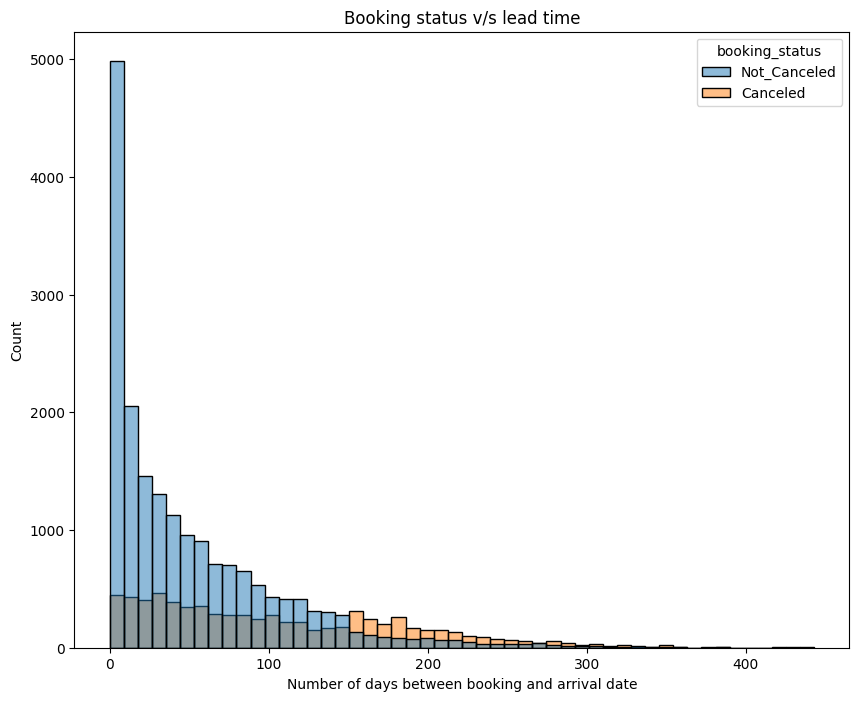

In [15]:
sns.histplot(x=data2['lead_time'],bins=50,hue=data2['booking_status'])
plt.title('Booking status v/s lead time')
plt.xlabel('Number of days between booking and arrival date')

hmph! So it seems that after around 150 days of booking , most people cancel their reseveration,
Lets zoom out this graph after 150 days

Text(0.5, 0, 'Number of days between booking and arrival date(Zoomed)')

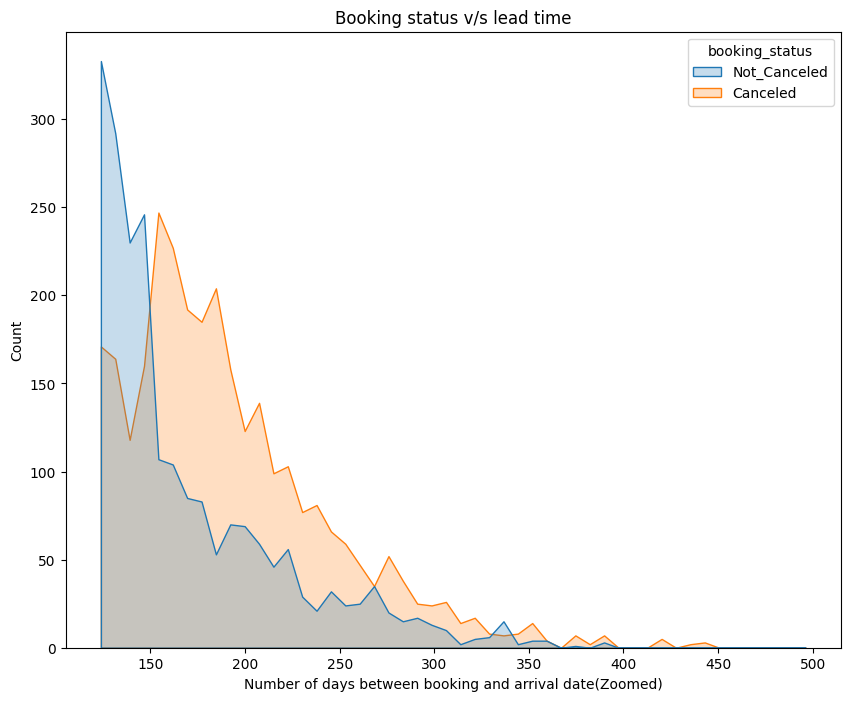

In [16]:
sns.histplot(x=data2['lead_time'],bins=50,hue=data2['booking_status'],binrange=(120,500),element= 'poly')
plt.title('Booking status v/s lead time')
plt.xlabel('Number of days between booking and arrival date(Zoomed)')

Eureka! our assumption was correct , Most of the cancellation occures  around (150 to 250)days  after booking

#### To conclude 'lead_time' is an important feature

Text(0.5, 0, 'Day of arrival date')

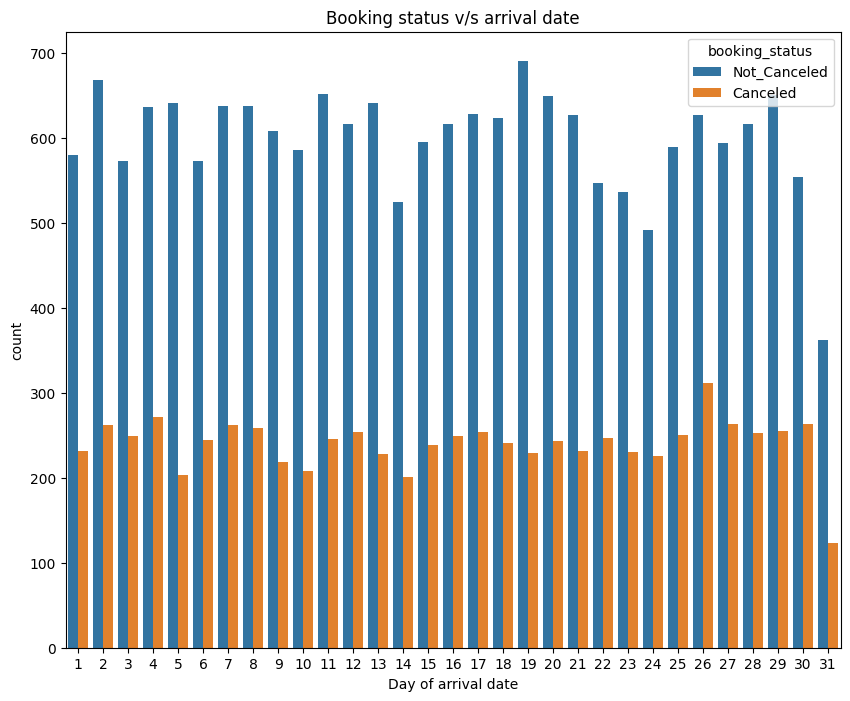

In [17]:
sns.countplot(x=data2['arrival_date'],hue=data2['booking_status'])
plt.title('Booking status v/s arrival date')
plt.xlabel('Day of arrival date')

It can be seen , that cancellation rate is  slightly more on 26th of month. But most of the value does not differ that much.
So, we wont consider this feature for prediction, due to less colinerarity

Text(0.5, 0, 'Number of previous cancellations')

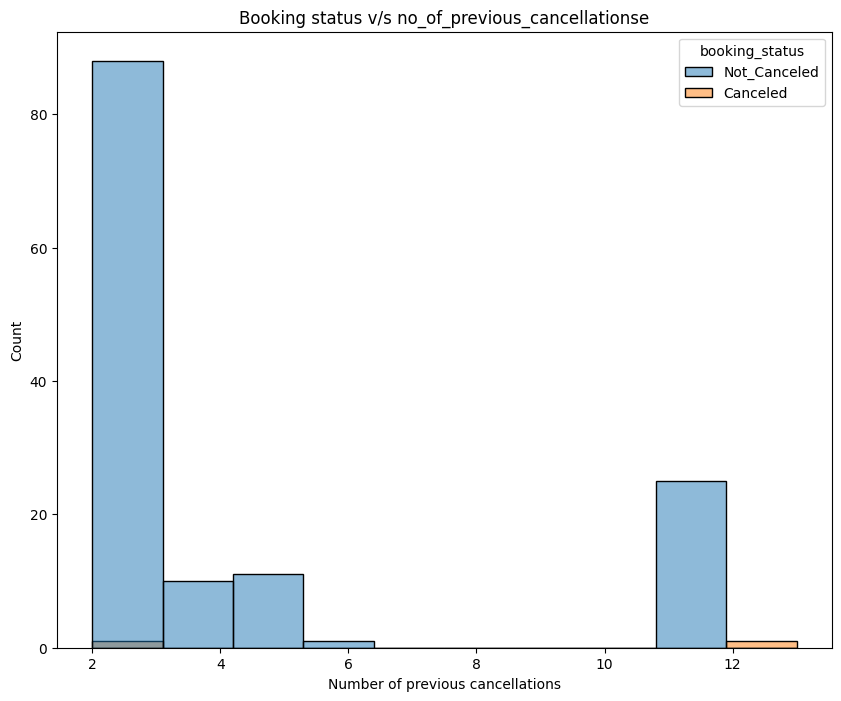

In [18]:
sns.histplot(x=data2['no_of_previous_cancellations'],bins=10,hue=data2['booking_status'],binrange=(2,13),element= 'bars')
plt.title('Booking status v/s no_of_previous_cancellationse')
plt.xlabel('Number of previous cancellations')

After 12 previous cancelations that booking is mostly going to get cancel

Text(0.5, 0, 'Number of  not previous cancellations(zomed)')

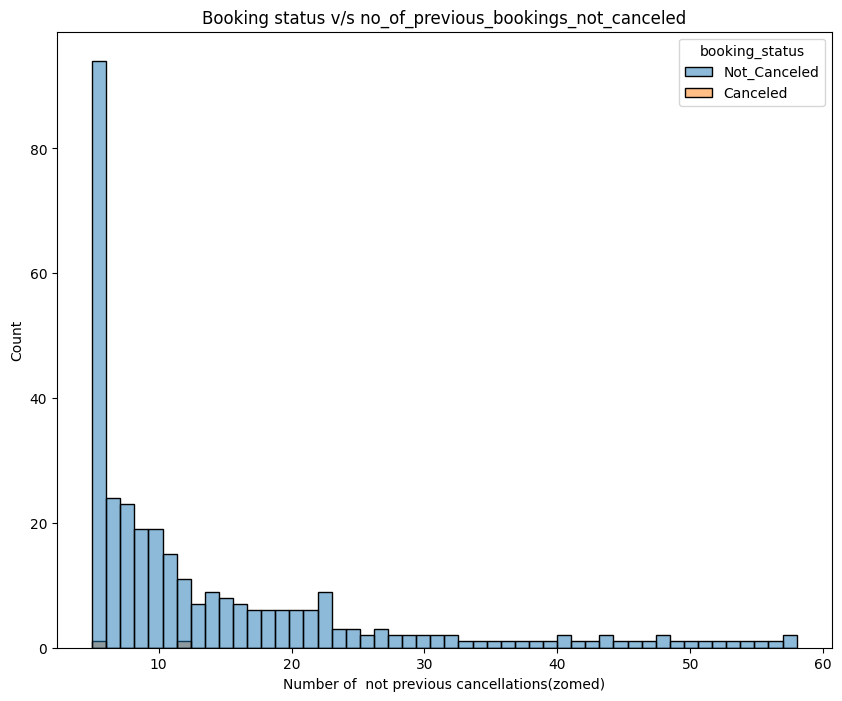

In [19]:
sns.histplot(x=data2['no_of_previous_bookings_not_canceled'],bins=50,hue=data2['booking_status'],binrange=(5,58),element= 'bars')
plt.title('Booking status v/s no_of_previous_bookings_not_canceled')
plt.xlabel('Number of  not previous cancellations(zomed)')

As observed from the graph , the  no_of_previous_bookings_not_canceled doenot show any significant effect on target varialable

Text(37.722222222222214, 0.5, 'Average price per room')

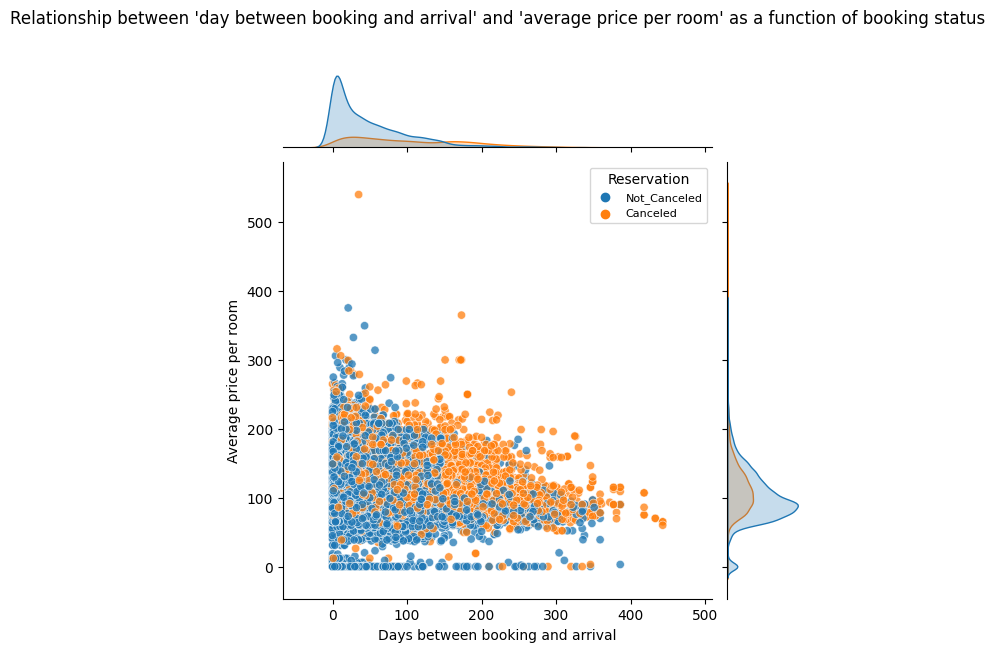

In [20]:
sns.jointplot(data=data2, x='lead_time', y='avg_price_per_room', 
              hue='booking_status', alpha=0.75)
plt.title('Relationship between \'day between booking and arrival\' and \'average price per room\' as a function of booking status', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 8})
plt.xlabel('Days between booking and arrival')
plt.ylabel('Average price per room')

* Majority of  Canceled bookings has average price in the range (100-200) euros
* And as inferred aboved, Majority of them are canceled between 150 to 300 days after booking
* There can be lot of values where Average price per room seems to be zero

Text(37.722222222222214, 0.5, 'Average price per room')

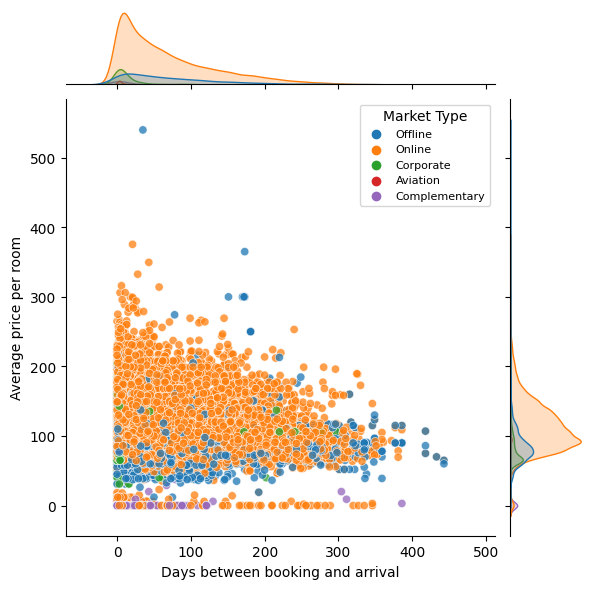

In [21]:
# exploring Records with Average_price_per_room is 0.0

sns.jointplot(data=data2, x='lead_time', y='avg_price_per_room', 
              hue='market_segment_type', alpha=0.75)
plt.legend(loc='upper right', title='Market Type', prop={'size': 8})
plt.xlabel('Days between booking and arrival')
plt.ylabel('Average price per room')

## <font color='green'>Data Preprocessing<font><a class='anchor' id='preprocess'>

#### Converting Categorical features to numeric Category type

In [22]:
data4 = data2.copy()

In [23]:
data4['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [24]:
data4['type_of_meal_plan'] = data4['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

In [25]:
data4['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [26]:
data4['room_type_reserved'] = data4['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

In [27]:
data4['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [28]:
data4['market_segment_type'] = data4['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

Encoding the target variable also,
- 1: Not Canceled
- 0: Canceled

In [29]:
data4['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [30]:
data4['booking_status'] = data4['booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})

In [31]:
#feature extraction
data4['total_day_stay'] = data4['no_of_week_nights'] + data4['no_of_weekend_nights']

In [32]:
data4.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_day_stay
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,1,3
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,1,5
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,0,3
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,0,2
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,0,2


In [33]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 36273
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_

Now that all our data is in numeric type , lets plot the heatmap

Text(0.5, 1.0, 'Correalation Map')

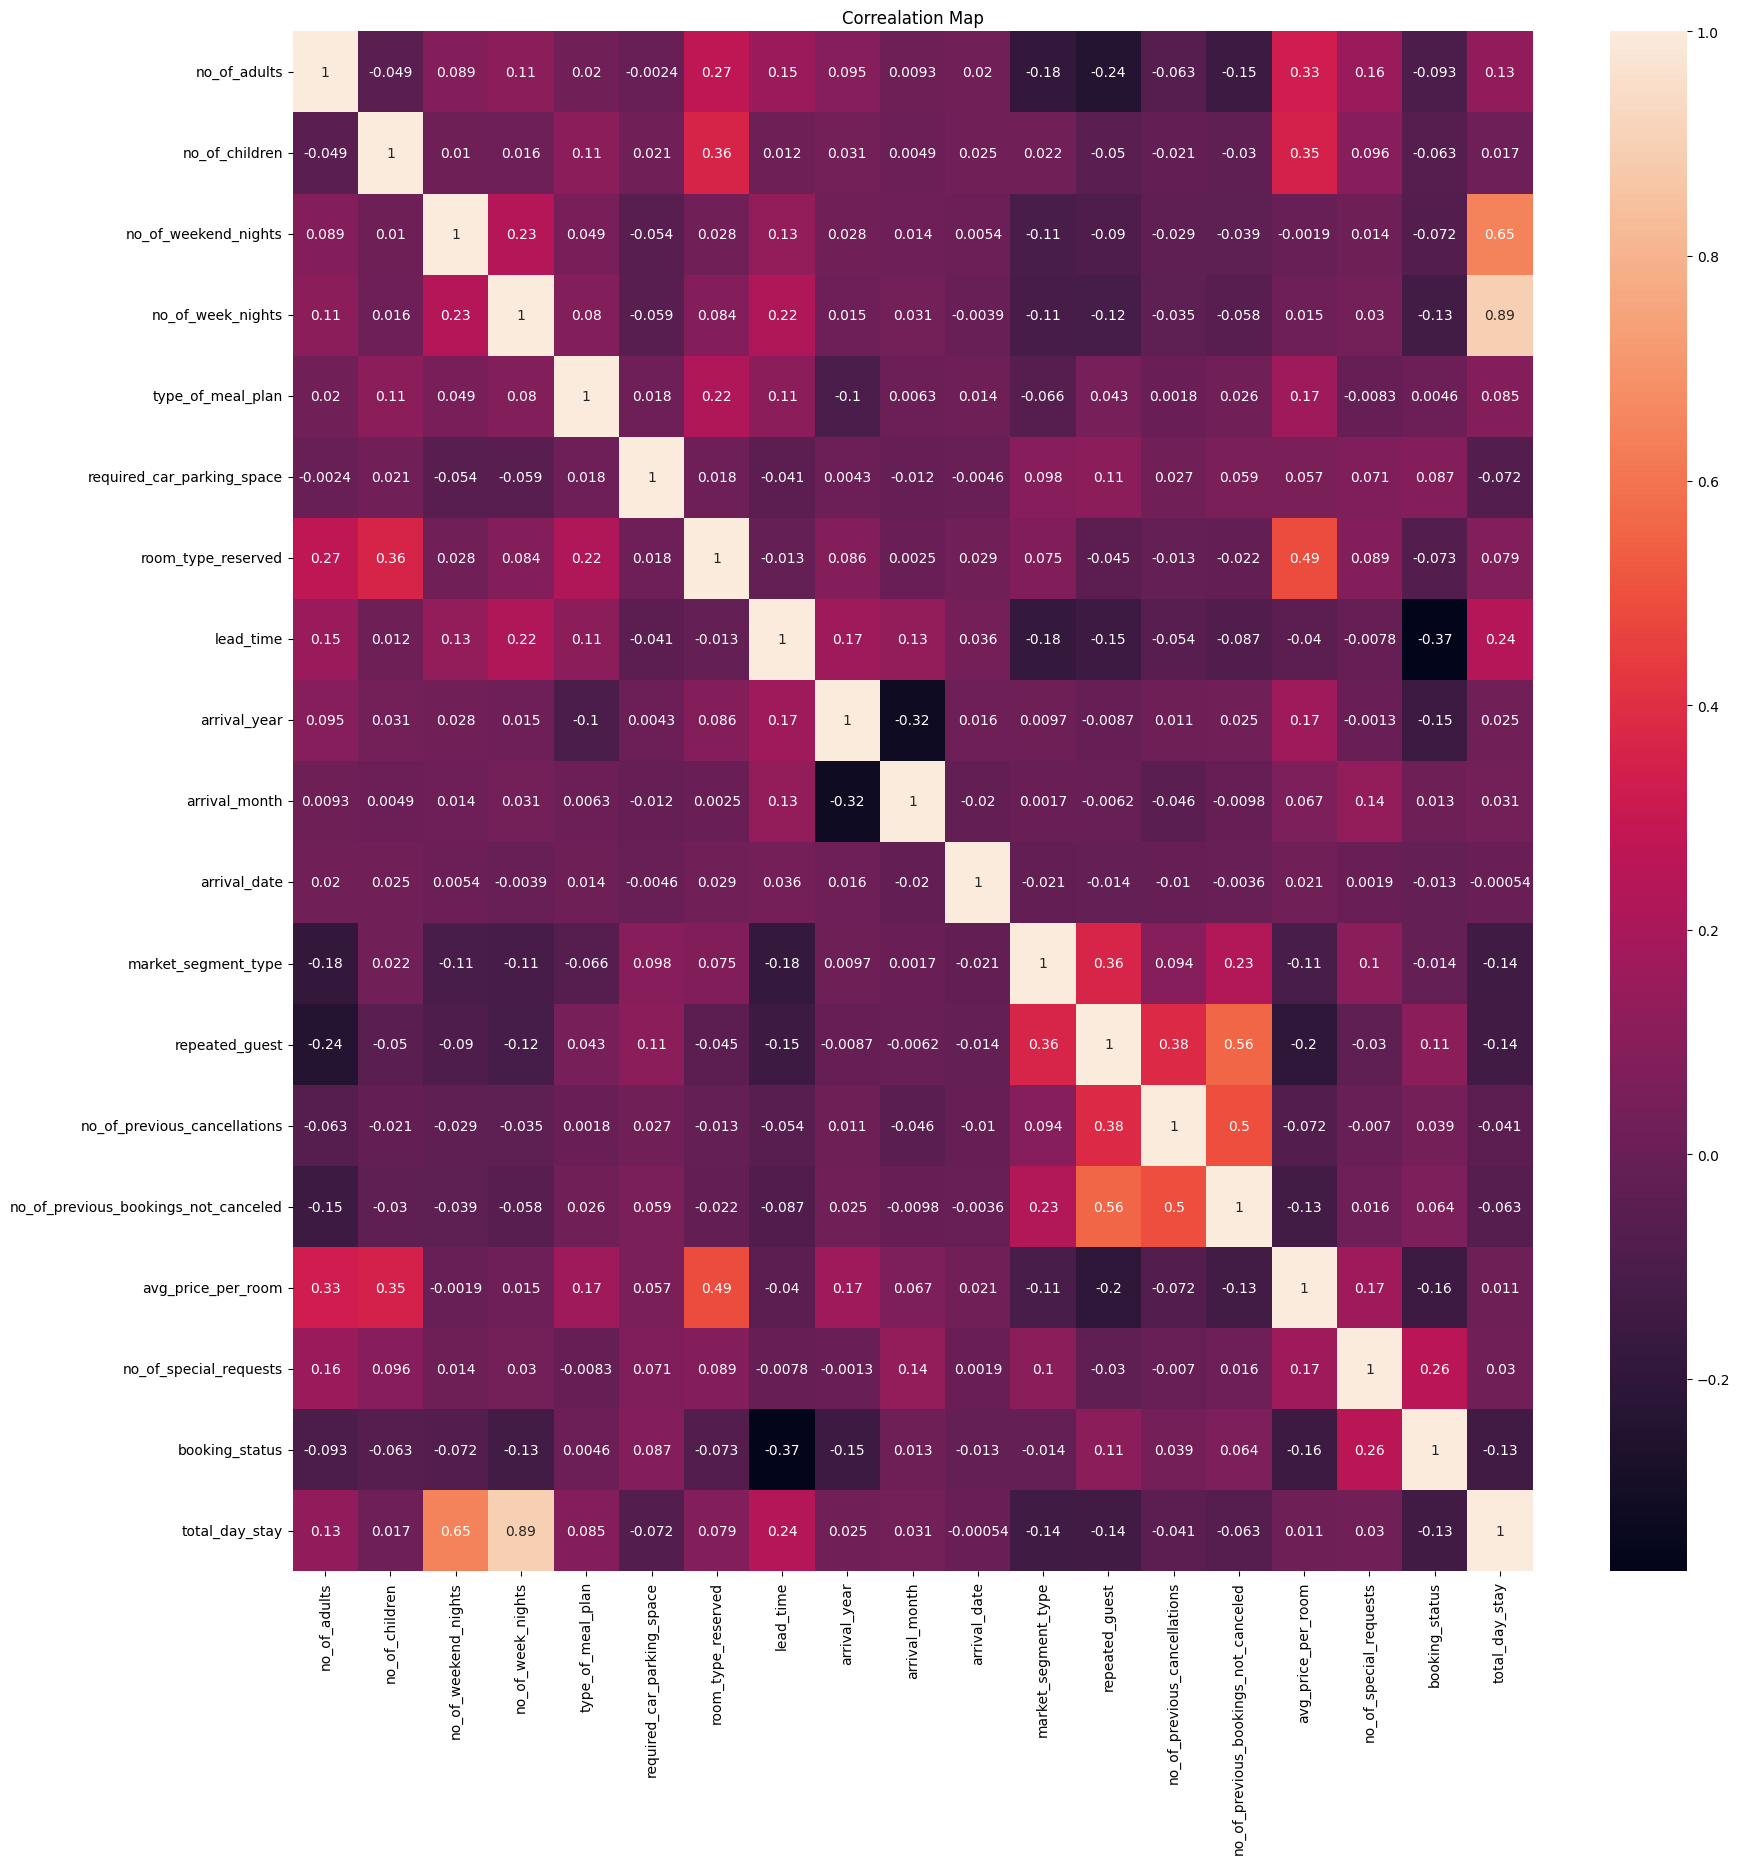

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(data4.corr(),annot=True)
plt.title('Correalation Map')

Inferences from heatmap
- many features are highly correlated with each other, thus we can remove least correalated features from this pairs.
- lead_time, avg_price_per_room,no_of_special_requests shows a very strong correaltion with the target variable


In [35]:

data5 = data4.copy()


In [36]:
data5.shape

(26000, 19)

## <font color='green'>Model Selection and Evalulation<font><a class='anchor' id='model'>

Writing function for plotting confusion matrix for further ease

In [37]:
#function for plotting confusion matrix
def plt_confusionMatrix(cm):
    fig,ax=plt.subplots()
    im = ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=['Not Cancel','cancel'], yticklabels=['Not Cancel','cancel'],
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    

As i am going to perform hyperparameter tunning using various  classification model, i will write a function that gives me the best hyperparameter

In [38]:
#function to get the best random search parameters
def get_best_parma(model):
    print('Best set of parameteres : ',model.best_params_)

 A function that would give me all important  evaluation metrics

In [39]:
def get_evaluation_metrics(y_test,y_pred):
    """Return evaluation metrics for a binary classification problem."""
    
    accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)
    pre = precision_score(y_true=y_test,y_pred=y_pred)
    recal = recall_score(y_true=y_test,y_pred=y_pred)
    f1 = f1_score(y_true=y_test,y_pred=y_pred)
    
    metrics = {
        'accuracy_score': accuracy,
        'precision_score': pre,
        'recall_score': recal,
        'f1_score':f1
    }
    return metrics
    

In [40]:
evalutaion_metrics = {}

##### Lets train the model with all feature on Catboost model and Find Out the best Features for our model

splitting into X and Y

In [41]:
X = data5.drop(columns=['booking_status'], axis=1)
y= data5['booking_status']

Performing 80%-20% train test split  with shuffling

In [42]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [43]:
print(f'Trainning Shape: {X_train.shape}')
print(f'Testing Shape: {X_test.shape}')

Trainning Shape: (20800, 18)
Testing Shape: (5200, 18)


Scalling the data in one standard format

In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creating Pool of dataset to pass through Catboost model

In [45]:
train_dataset = cb.Pool(X_train_scaled,y_train)
test_dataset = cb.Pool(X_test_scaled,y_test)

Definning catboost model

In [46]:
cat_model = cb.CatBoostClassifier(loss_function='Logloss')

In [47]:
#Grid Search

grid = {'iterations': [150,200], 
       'learning_rate': [0.05, 0.1], 
       'depth': [2, 4, 6, 8,10]}

cat_model.grid_search(grid, train_dataset)

0:	learn: 0.6726886	test: 0.6735451	best: 0.6735451 (0)	total: 171ms	remaining: 25.5s
1:	learn: 0.6545623	test: 0.6562541	best: 0.6562541 (1)	total: 184ms	remaining: 13.6s
2:	learn: 0.6397407	test: 0.6418316	best: 0.6418316 (2)	total: 204ms	remaining: 9.99s
3:	learn: 0.6248637	test: 0.6275005	best: 0.6275005 (3)	total: 216ms	remaining: 7.88s
4:	learn: 0.6122092	test: 0.6154036	best: 0.6154036 (4)	total: 231ms	remaining: 6.71s
5:	learn: 0.6002257	test: 0.6037869	best: 0.6037869 (5)	total: 238ms	remaining: 5.72s
6:	learn: 0.5902855	test: 0.5940085	best: 0.5940085 (6)	total: 249ms	remaining: 5.09s
7:	learn: 0.5804216	test: 0.5842328	best: 0.5842328 (7)	total: 264ms	remaining: 4.69s
8:	learn: 0.5722088	test: 0.5763590	best: 0.5763590 (8)	total: 274ms	remaining: 4.29s
9:	learn: 0.5634892	test: 0.5680675	best: 0.5680675 (9)	total: 283ms	remaining: 3.96s
10:	learn: 0.5555861	test: 0.5603585	best: 0.5603585 (10)	total: 290ms	remaining: 3.67s
11:	learn: 0.5482041	test: 0.5528849	best: 0.5528849

114:	learn: 0.3974500	test: 0.4055993	best: 0.4055993 (114)	total: 1.92s	remaining: 585ms
115:	learn: 0.3970797	test: 0.4052471	best: 0.4052471 (115)	total: 1.93s	remaining: 566ms
116:	learn: 0.3968343	test: 0.4050354	best: 0.4050354 (116)	total: 1.94s	remaining: 546ms
117:	learn: 0.3965617	test: 0.4048124	best: 0.4048124 (117)	total: 1.95s	remaining: 529ms
118:	learn: 0.3962933	test: 0.4045165	best: 0.4045165 (118)	total: 1.96s	remaining: 511ms
119:	learn: 0.3959326	test: 0.4041418	best: 0.4041418 (119)	total: 1.97s	remaining: 492ms
120:	learn: 0.3957340	test: 0.4039086	best: 0.4039086 (120)	total: 1.98s	remaining: 475ms
121:	learn: 0.3955169	test: 0.4037554	best: 0.4037554 (121)	total: 1.99s	remaining: 457ms
122:	learn: 0.3951980	test: 0.4035048	best: 0.4035048 (122)	total: 2s	remaining: 439ms
123:	learn: 0.3948622	test: 0.4031796	best: 0.4031796 (123)	total: 2.02s	remaining: 423ms
124:	learn: 0.3945727	test: 0.4029134	best: 0.4029134 (124)	total: 2.03s	remaining: 406ms
125:	learn: 0

{'params': {'depth': 8, 'iterations': 200, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

I will create a Dataframe with the important feature and there importance for performing feature selection

In [48]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = X.columns
feature_importance_df['importance'] = cat_model.feature_importances_

#sorting based on correalation score
feature_importance_df = feature_importance_df.sort_values(by=['importance'],ascending=False)

In [49]:
feature_importance_df

,features,importance
7,lead_time,23.298487
16,no_of_special_requests,21.394229
9,arrival_month,13.218112
15,avg_price_per_room,11.971132
11,market_segment_type,7.764718
10,arrival_date,3.777197
5,required_car_parking_space,3.178429
3,no_of_week_nights,2.914564
2,no_of_weekend_nights,2.494672
8,arrival_year,2.481590


In [50]:
#making a list with only important feature(features whose importance is more than 45%)
important_feature =feature_importance_df[feature_importance_df['importance'] > 0.45]['features']

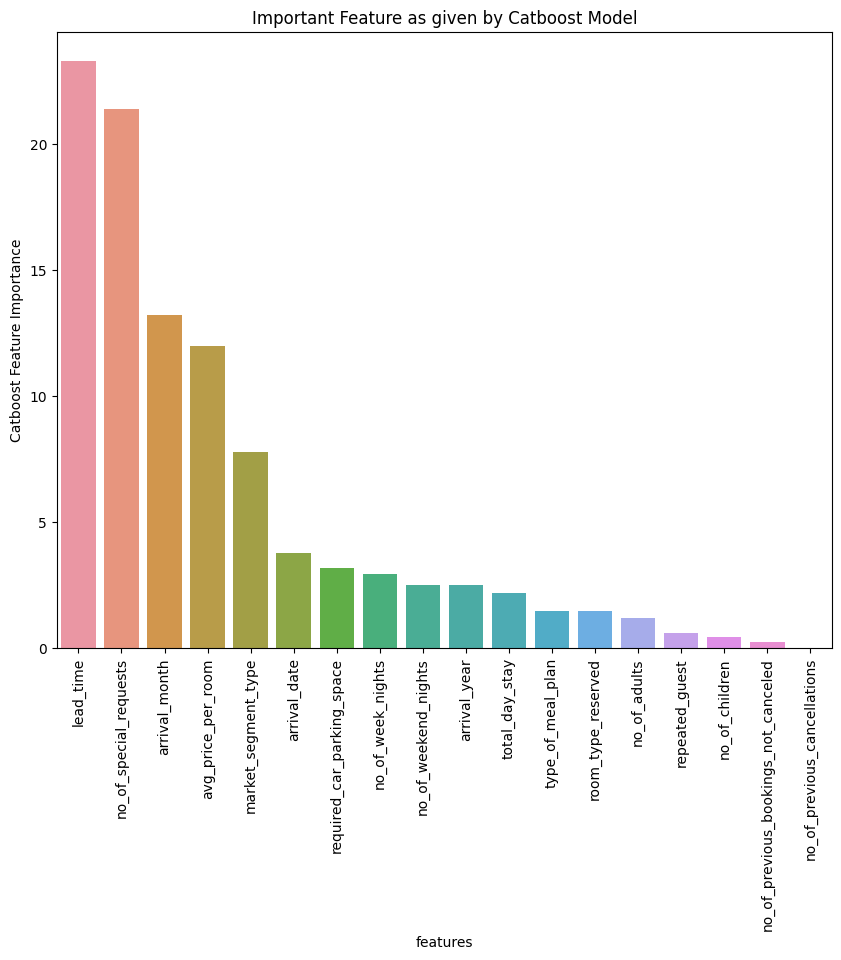

In [52]:
#ploting graoh for better visualization

sns.barplot(x=feature_importance_df.features,y=feature_importance_df.importance)
plt.ylabel('Catboost Feature Importance')
plt.title('Important Feature as given by Catboost Model')
plt.xticks(rotation = 90)
plt.show()

In [53]:
pred_catboost = cat_model.predict(X_test_scaled)

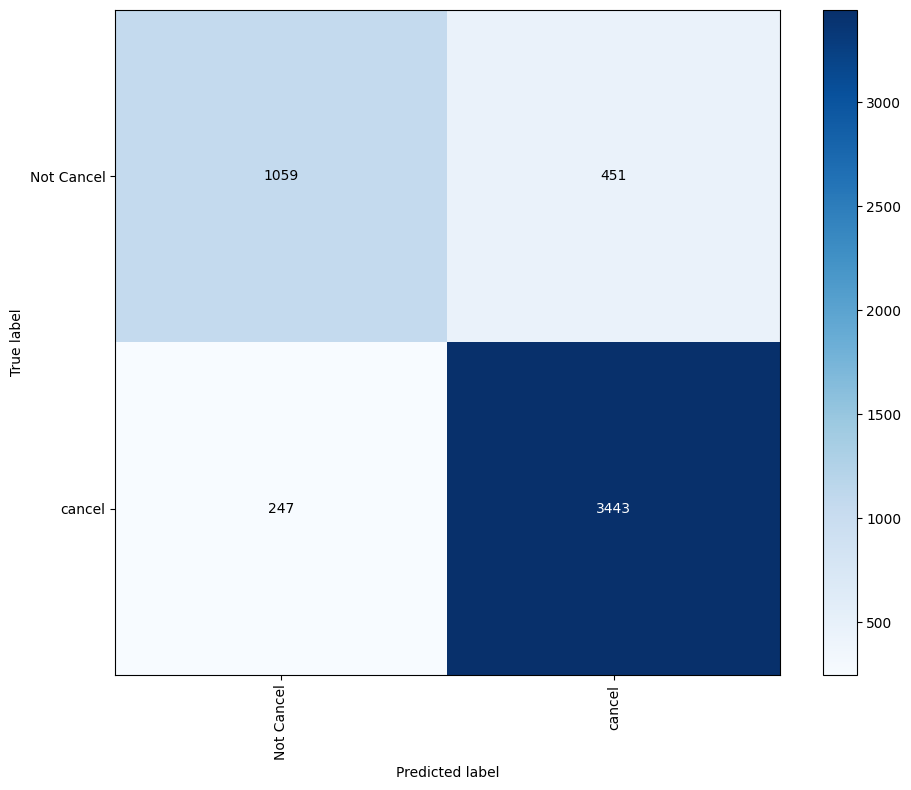

In [54]:
cm = confusion_matrix(y_true=y_test.values,y_pred=pred_catboost)
plt_confusionMatrix(cm)



##### Our aim here would be reduced the number of False negative i.e we will focus more on recall score
- False negatives: The room is Canceled(0) where are model predicts is as Not-cancel(1)

Lets just first calculate  evaluation matrics for all models , then we will compare them

In [55]:
evalutaion_metrics['Catboost_with_all_features'] = get_evaluation_metrics(y_test,pred_catboost)

#### Trainning models with only best features

In [56]:
#Training models with only best feature
X = data5[important_feature]
y = data5['booking_status']

In [57]:
X.shape

(26000, 15)

In [58]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [59]:
print(f'Trainnning Shape: {X_train.shape}')
print(f'Testing Shape: {X_test.shape}')

Trainnning Shape: (20800, 15)
Testing Shape: (5200, 15)


In [60]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### <font  color='blue'>Logistic regression  with Hyperparameter tuning and cross validation</font>

In [61]:
#hyperparameter tunning will look for best parameters for your model
parameters = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()

#training model based on different batches(Kfold method)(cross validating)
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameters, cv=5,random_state=0)
lr_classifier_rs.fit(X_train_scaled,y_train)
y_pred_lr=lr_classifier_rs.predict(X_test_scaled)

Text(0.5, 1.0, 'Prediction using Logistic Regression')

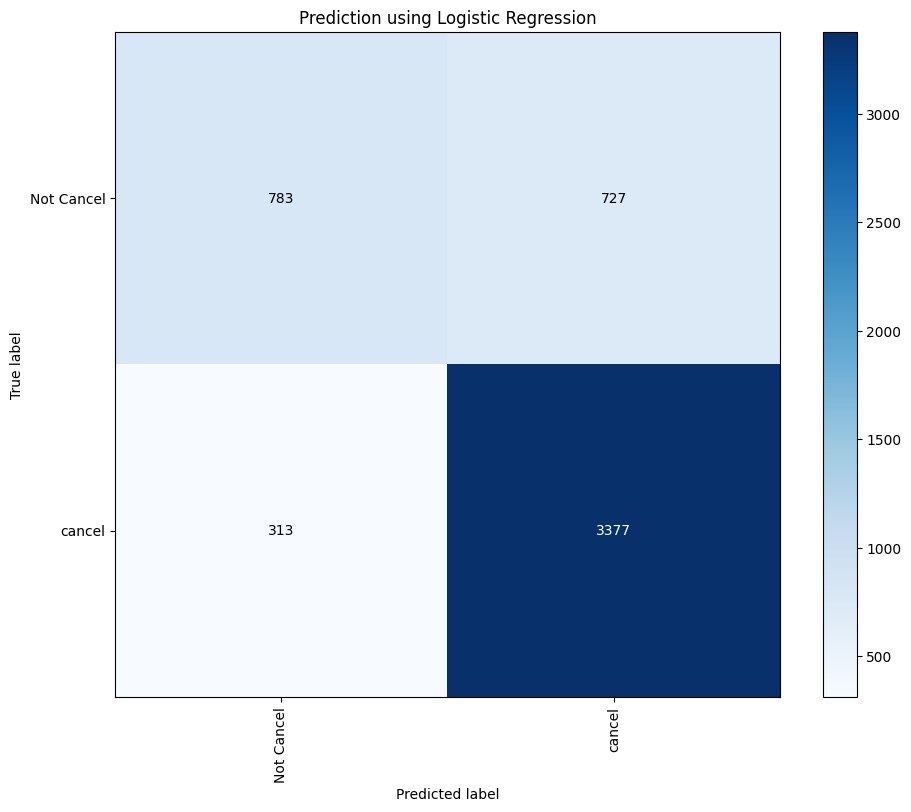

In [62]:
cm=confusion_matrix(y_test.values,y_pred_lr)
plt_confusionMatrix(cm)
plt.title('Prediction using Logistic Regression')

In [63]:
get_best_parma(lr_classifier_rs)


Best set of parameteres :  {'max_iter': 100}


In [64]:
evalutaion_metrics['LogisticRegression'] = get_evaluation_metrics(y_test,y_pred_lr)

In [65]:
print(evalutaion_metrics['LogisticRegression'] )

{'accuracy_score': 0.8, 'precision_score': 0.8228557504873294, 'recall_score': 0.9151761517615176, 'f1_score': 0.8665640236079034}


#### <font color='blue'>SVM model with Hyperparameter tuning and cross validation</font>

In [66]:
#defing parameteres
parameters = {'kernel':['rbf','sigmoid','poly','linear'],
              'C': [100]
              }
svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=5,random_state=0)
svm_rs.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [100],
                                        'kernel': ['rbf', 'sigmoid', 'poly',
                                                   'linear']},
                   random_state=0)

In [67]:
y_pred_svm = svm_rs.predict(X_test_scaled)

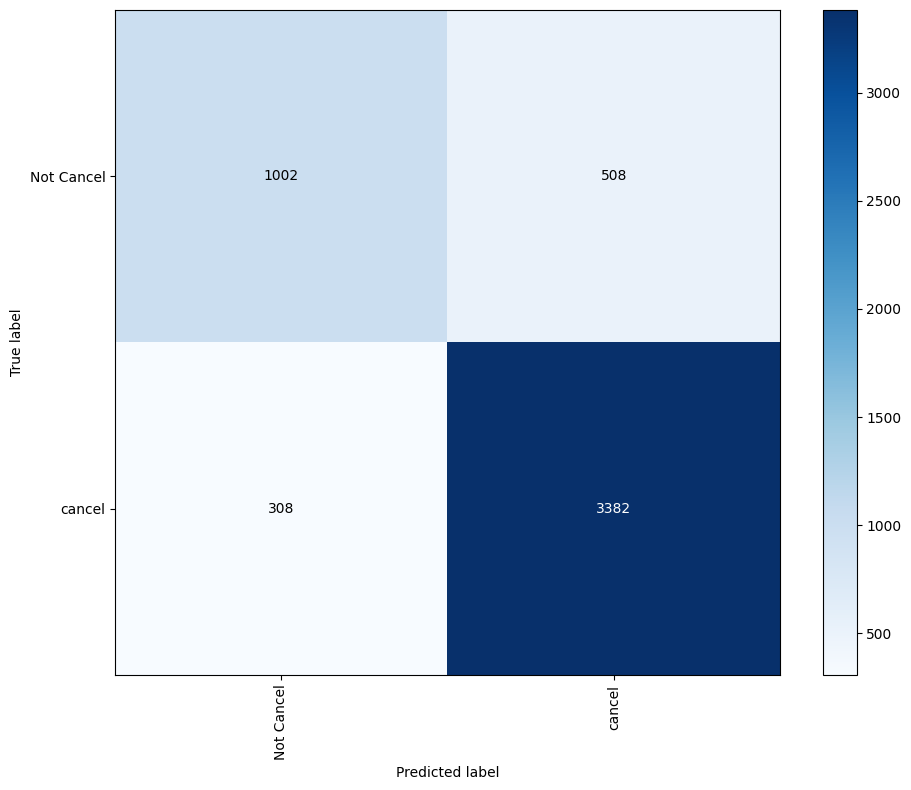

In [68]:
cm=confusion_matrix(y_test.values,y_pred_svm)
plt_confusionMatrix(cm)

In [69]:
get_best_parma(svm_rs)

Best set of parameteres :  {'kernel': 'rbf', 'C': 100}


In [70]:
evalutaion_metrics['SupportVectorMachine'] = get_evaluation_metrics(y_test,y_pred_svm)

#### <font color='blue'>Decision Tree Model with Hyperparameter tuning and cross validation</font>

In [71]:
parameters = {'max_depth':np.arange(2,10,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters,cv=2, random_state = 0)
dt_classifier_rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=0)

In [72]:
get_best_parma(dt_classifier_rs)

Best set of parameteres :  {'max_depth': 8}


In [73]:
y_pred_dt = dt_classifier_rs.predict(X_test_scaled)

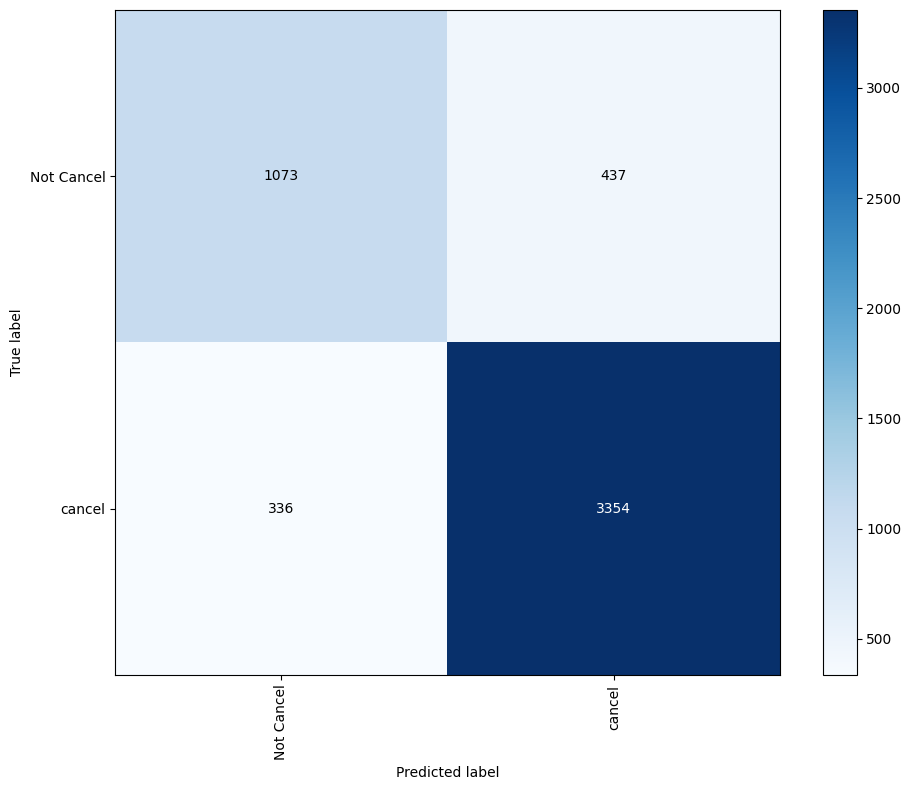

In [74]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_dt)
plt_confusionMatrix(cm)

In [75]:
evalutaion_metrics['DecissionTreeClassifier'] = get_evaluation_metrics(y_test,y_pred_dt)

#### <font color='blue'>Random Forest with Hyperparameter tuning and cross validation</font>

In [76]:
parameters = {
    'n_estimators':np.arange(20, 100, 10), 
    'max_depth': np.arange(4,20, 4)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state = 0)
rf_classifier_rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 4,  8, 12, 16]),
                                        'n_estimators': array([20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=0)

In [77]:
get_best_parma(rf_classifier_rs)

Best set of parameteres :  {'n_estimators': 60, 'max_depth': 16}


In [78]:
y_pred_rf = rf_classifier_rs.predict(X_test_scaled)

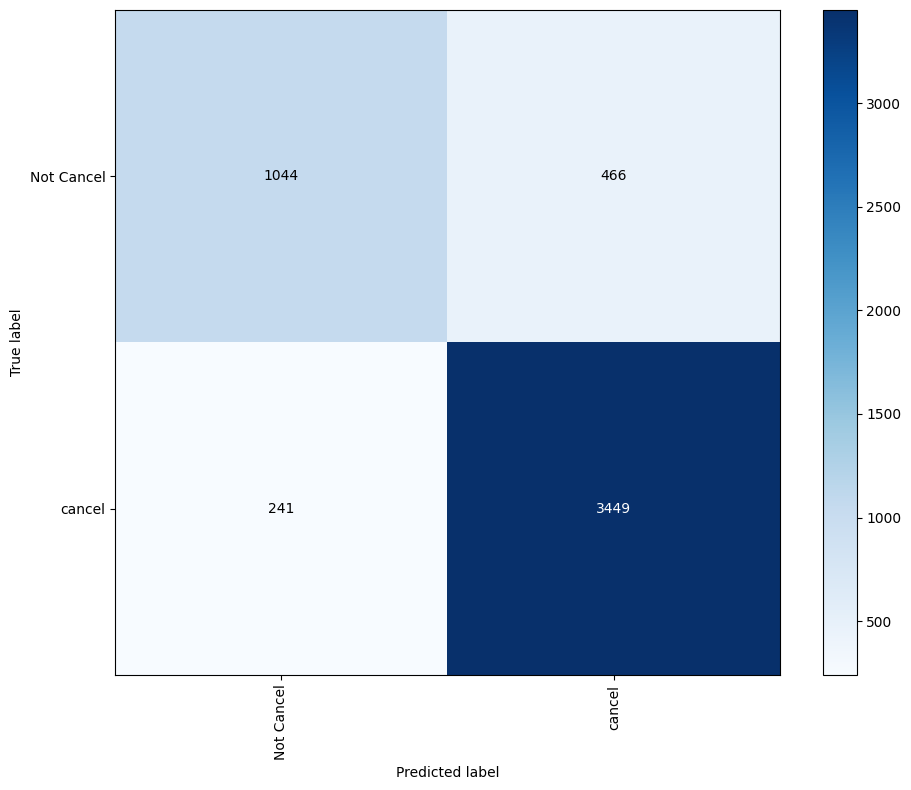

In [79]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_rf)
plt_confusionMatrix(cm)

In [80]:
evalutaion_metrics['RandomForest'] = get_evaluation_metrics(y_test,y_pred_rf)

#### <font color='blue'>Gradient Boosting with Hyperparameter tuning and cross validation</font>

In [81]:
parameters = {
    'criterion':['log_loss'],
    'max_depth': np.arange(4,20, 4)
}
gb_classifier = GradientBoostingClassifier()
gb_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state = 42)
gb_classifier_rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['log_loss'],
                                        'max_depth': array([ 4,  8, 12, 16])},
                   random_state=42)

In [82]:
get_best_parma(gb_classifier_rs)

Best set of parameteres :  {'max_depth': 16, 'criterion': 'log_loss'}


In [83]:
y_pred_gb = gb_classifier_rs.predict(X_test_scaled)

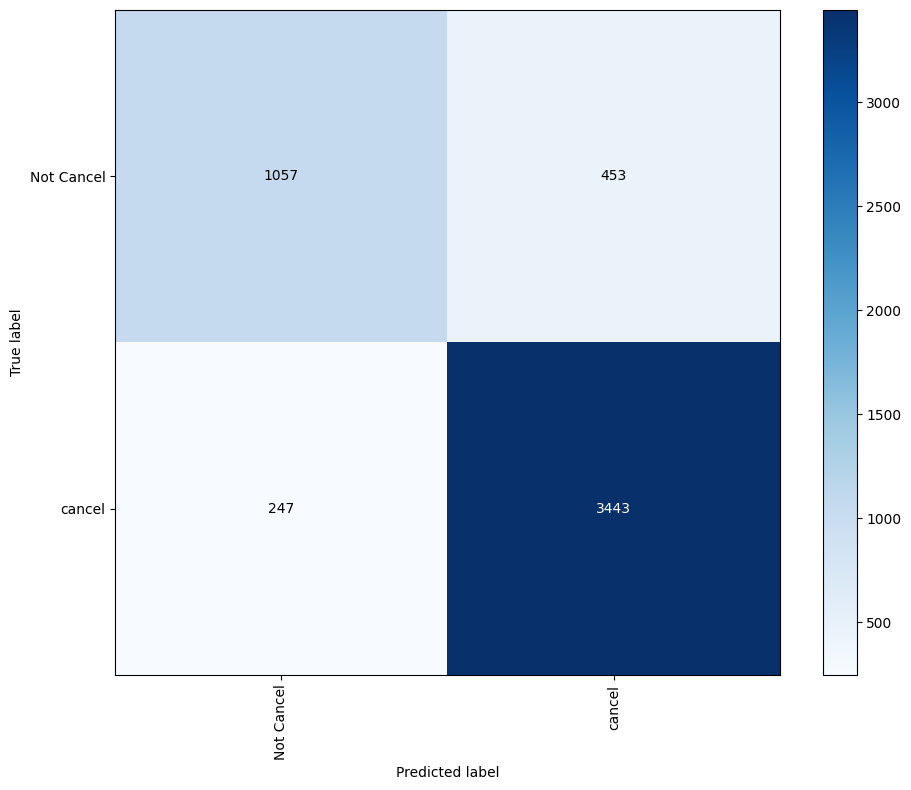

In [84]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_gb)
plt_confusionMatrix(cm)

In [85]:
evalutaion_metrics['GradientBoost'] = get_evaluation_metrics(y_test,y_pred_gb)

#### <font color='blue'>Hyperparameter Tunning for CatBoost with selected features</font>


In [86]:
train_dataset1 = cb.Pool(X_train_scaled,y_train)
test_dataset1 = cb.Pool(X_test_scaled,y_test)


In [87]:
cat_selectedFeature = cb.CatBoostClassifier(loss_function='Logloss')
#Grid Search

grid = {'iterations': [190], 
       'learning_rate': [0.1], 
       'depth': [6, 8,10]}

cat_selectedFeature.grid_search(grid, train_dataset1)

0:	learn: 0.6268599	test: 0.6290911	best: 0.6290911 (0)	total: 43.6ms	remaining: 8.24s
1:	learn: 0.5753376	test: 0.5794338	best: 0.5794338 (1)	total: 61.8ms	remaining: 5.81s
2:	learn: 0.5372927	test: 0.5425828	best: 0.5425828 (2)	total: 83.3ms	remaining: 5.19s
3:	learn: 0.5053976	test: 0.5116863	best: 0.5116863 (3)	total: 107ms	remaining: 4.97s
4:	learn: 0.4781161	test: 0.4854650	best: 0.4854650 (4)	total: 137ms	remaining: 5.07s
5:	learn: 0.4614505	test: 0.4698355	best: 0.4698355 (5)	total: 155ms	remaining: 4.75s
6:	learn: 0.4481103	test: 0.4564896	best: 0.4564896 (6)	total: 173ms	remaining: 4.53s
7:	learn: 0.4353586	test: 0.4433161	best: 0.4433161 (7)	total: 190ms	remaining: 4.32s
8:	learn: 0.4256332	test: 0.4339220	best: 0.4339220 (8)	total: 212ms	remaining: 4.26s
9:	learn: 0.4162791	test: 0.4250468	best: 0.4250468 (9)	total: 237ms	remaining: 4.26s
10:	learn: 0.4093622	test: 0.4181430	best: 0.4181430 (10)	total: 256ms	remaining: 4.16s
11:	learn: 0.4027707	test: 0.4115251	best: 0.4115

{'params': {'depth': 8, 'iterations': 190, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [89]:
pred_catboost_f = cat_selectedFeature.predict(X_test_scaled)


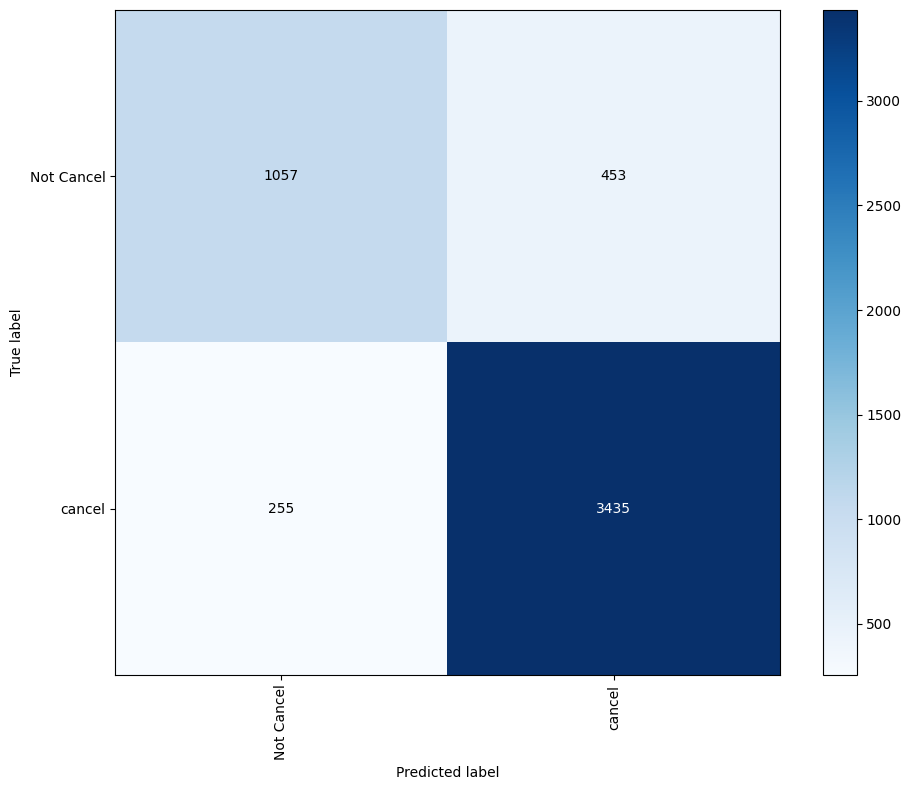

In [90]:
cm = confusion_matrix(y_true=y_test.values,y_pred=pred_catboost_f)
plt_confusionMatrix(cm)

In [91]:
evalutaion_metrics['CatBoost_selectedFeature'] = get_evaluation_metrics(y_test,pred_catboost_f)

#### <font color = 'blue'>Trainning the model with ANN</font>

In [92]:
from keras.layers import Dense, Dropout,Flatten
from keras.optimizers import SGD,Adam
from keras.models import Sequential
import tensorflow as tf

In [93]:
model_ANN = None
model_ANN = Sequential()
input_dims = len(important_feature)   
model_ANN.add(Dense(128, activation='relu', input_dim=input_dims))
model_ANN.add(Dropout(0.1))

model_ANN.add(Dense(64, activation='relu'))
model_ANN.add(Dropout(0.1))

model_ANN.add(Dense(32, activation='relu'))
model_ANN.add(Dropout(0.3))

model_ANN.add(Dense(8, activation='relu'))
model_ANN.add(Dropout(0.1))
model_ANN.add(Dense(1, activation='sigmoid'))
print(model_ANN.summary())
model_ANN.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics = ['accuracy'])

hist = model_ANN.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 2

[]

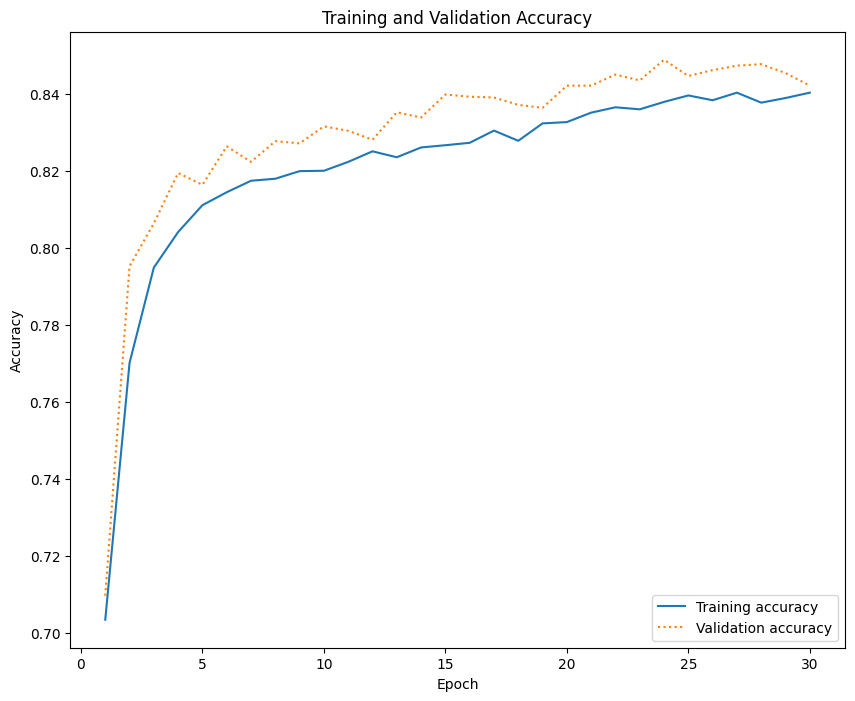

In [94]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [95]:
ann_predict= model_ANN.predict(X_test_scaled) > 0.5

163/163 [==============================] - 1s 2ms/step


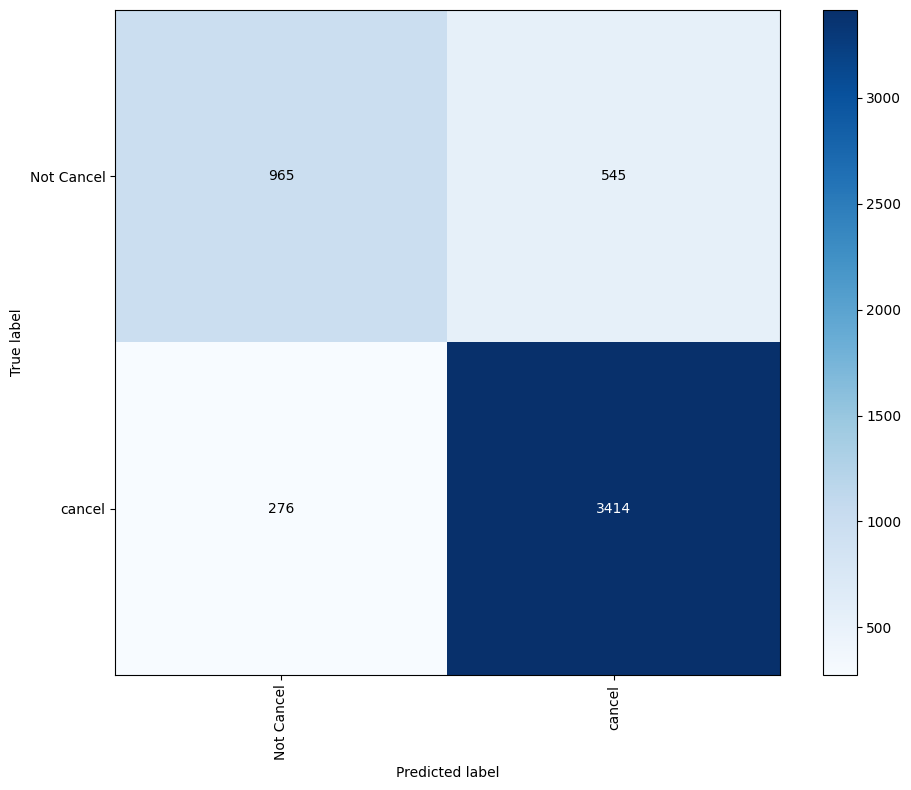

In [96]:
cm = confusion_matrix(y_true=y_test.values,y_pred=ann_predict)
plt_confusionMatrix(cm)

In [97]:
evalutaion_metrics['ArtificialNeuralNetwork'] = get_evaluation_metrics(y_test,ann_predict)

In [98]:
evaluation_data = pd.DataFrame(evalutaion_metrics.values(),index=evalutaion_metrics.keys())
evaluation_data

,accuracy_score,precision_score,recall_score,f1_score
Catboost_with_all_features,0.865769,0.884181,0.933062,0.907964
LogisticRegression,0.800000,0.822856,0.915176,0.866564
SupportVectorMachine,0.843077,0.869409,0.916531,0.892348
DecissionTreeClassifier,0.851346,0.884727,0.908943,0.896672
RandomForest,0.864038,0.880971,0.934688,0.907035
GradientBoost,0.865385,0.883727,0.933062,0.907725
CatBoost_selectedFeature,0.863846,0.883488,0.930894,0.906572
ArtificialNeuralNetwork,0.842115,0.862339,0.925203,0.892666


I would Choose CatBoost algorithm as it perfroms the best

In [100]:
#saving the model
import pickle

with open('geekschallenge_Renuka_Wadikar.pickle','wb') as f :
    pickle.dump(cat_model,f)

### Project Report

- As a first step, i performed understanding the problem statement,Data Exploration and Data Cleaning
    - checking for any null values
    - deleting some duplicated values
    - exploring the distribution of data using barplot.
    - performing correlation analysis to check if there is any relationship between variables and target variable.
    - dectecting if  presence of outliers.
    *There were some imputed values or outliers present in the avg_price_pre_room value, but i decided not to preprocess it as the count of them very comparitvly less*
- After that i plotted correraltion matrix to visualize correalation among various features and target variable
- Then i used Catboost Model to check this features are really highly correrakted or not
- I trained catboost model on train dataset with all columns except target variable.
- important features where :
    - `lead_time`
    - `no_of_special_requests`
    - `arrival_month`
    - `avg_price_per_room`
    - `market_segment_type`
    - `arrival_date`
    - `required_car_parking_space`
    - `no_of_week_nights`
    - `no_of_weekend_nights`
    - `arrival_year`
    - `total_day_stay`
    - `type_of_meal_plan`
    - `room_type_reserved`
    - `no_of_adults`
    - `repeated_guest`
- Perform Standardization on the input feature using MinMaxScaler
- I trained all other models with only these features , and evaluated its performance using confusion matrix, and other evalulation metrics like (accuracy, precision,recall,f1 score)
- I used `Catboost_with_all_features	accuracy: 86%	precision:88%	recall: 93%	 f1_score:90%` this model becuase it showed the best metrcis among all trained on the test dataset 
